# Regresión lineal y logit

## Regresión lineal

Las regresiones lineales, como vimos en la presentación, nos sirven para realizar predicciones de valores. Vamos por ejemplo a predecir el valor de casas en Boston para empezar con un ejemplo sencillo.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

Leémos la base de datos

In [35]:
from sklearn.datasets import load_boston
boston = load_boston() # Ojo porque es un diccionario, no un dataframe tal cual

In [36]:
type(boston)

sklearn.utils.Bunch

In [37]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [38]:
boston.data.shape

(506, 13)

In [39]:
boston.feature_names # Esto son nuestras variables independientes

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
boston.target # Estos son precios (mediana) de las casas

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [41]:
print(boston.DESCR) # Aquí vemos qué es cada variable

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
house_bos = pd.DataFrame(boston.data)
house_bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# pongámos los nombres que vienen en feature_names
house_bos.columns = boston.feature_names
house_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Vamos a poner en la misma base de datos también la variable de precios, para hacer una matriz de correlación para ver de forma rápida posibles atributos que puedan ayudar a predecir mejor los valores de la casas

In [46]:
house_bos['PRICE'] = boston.target
house_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


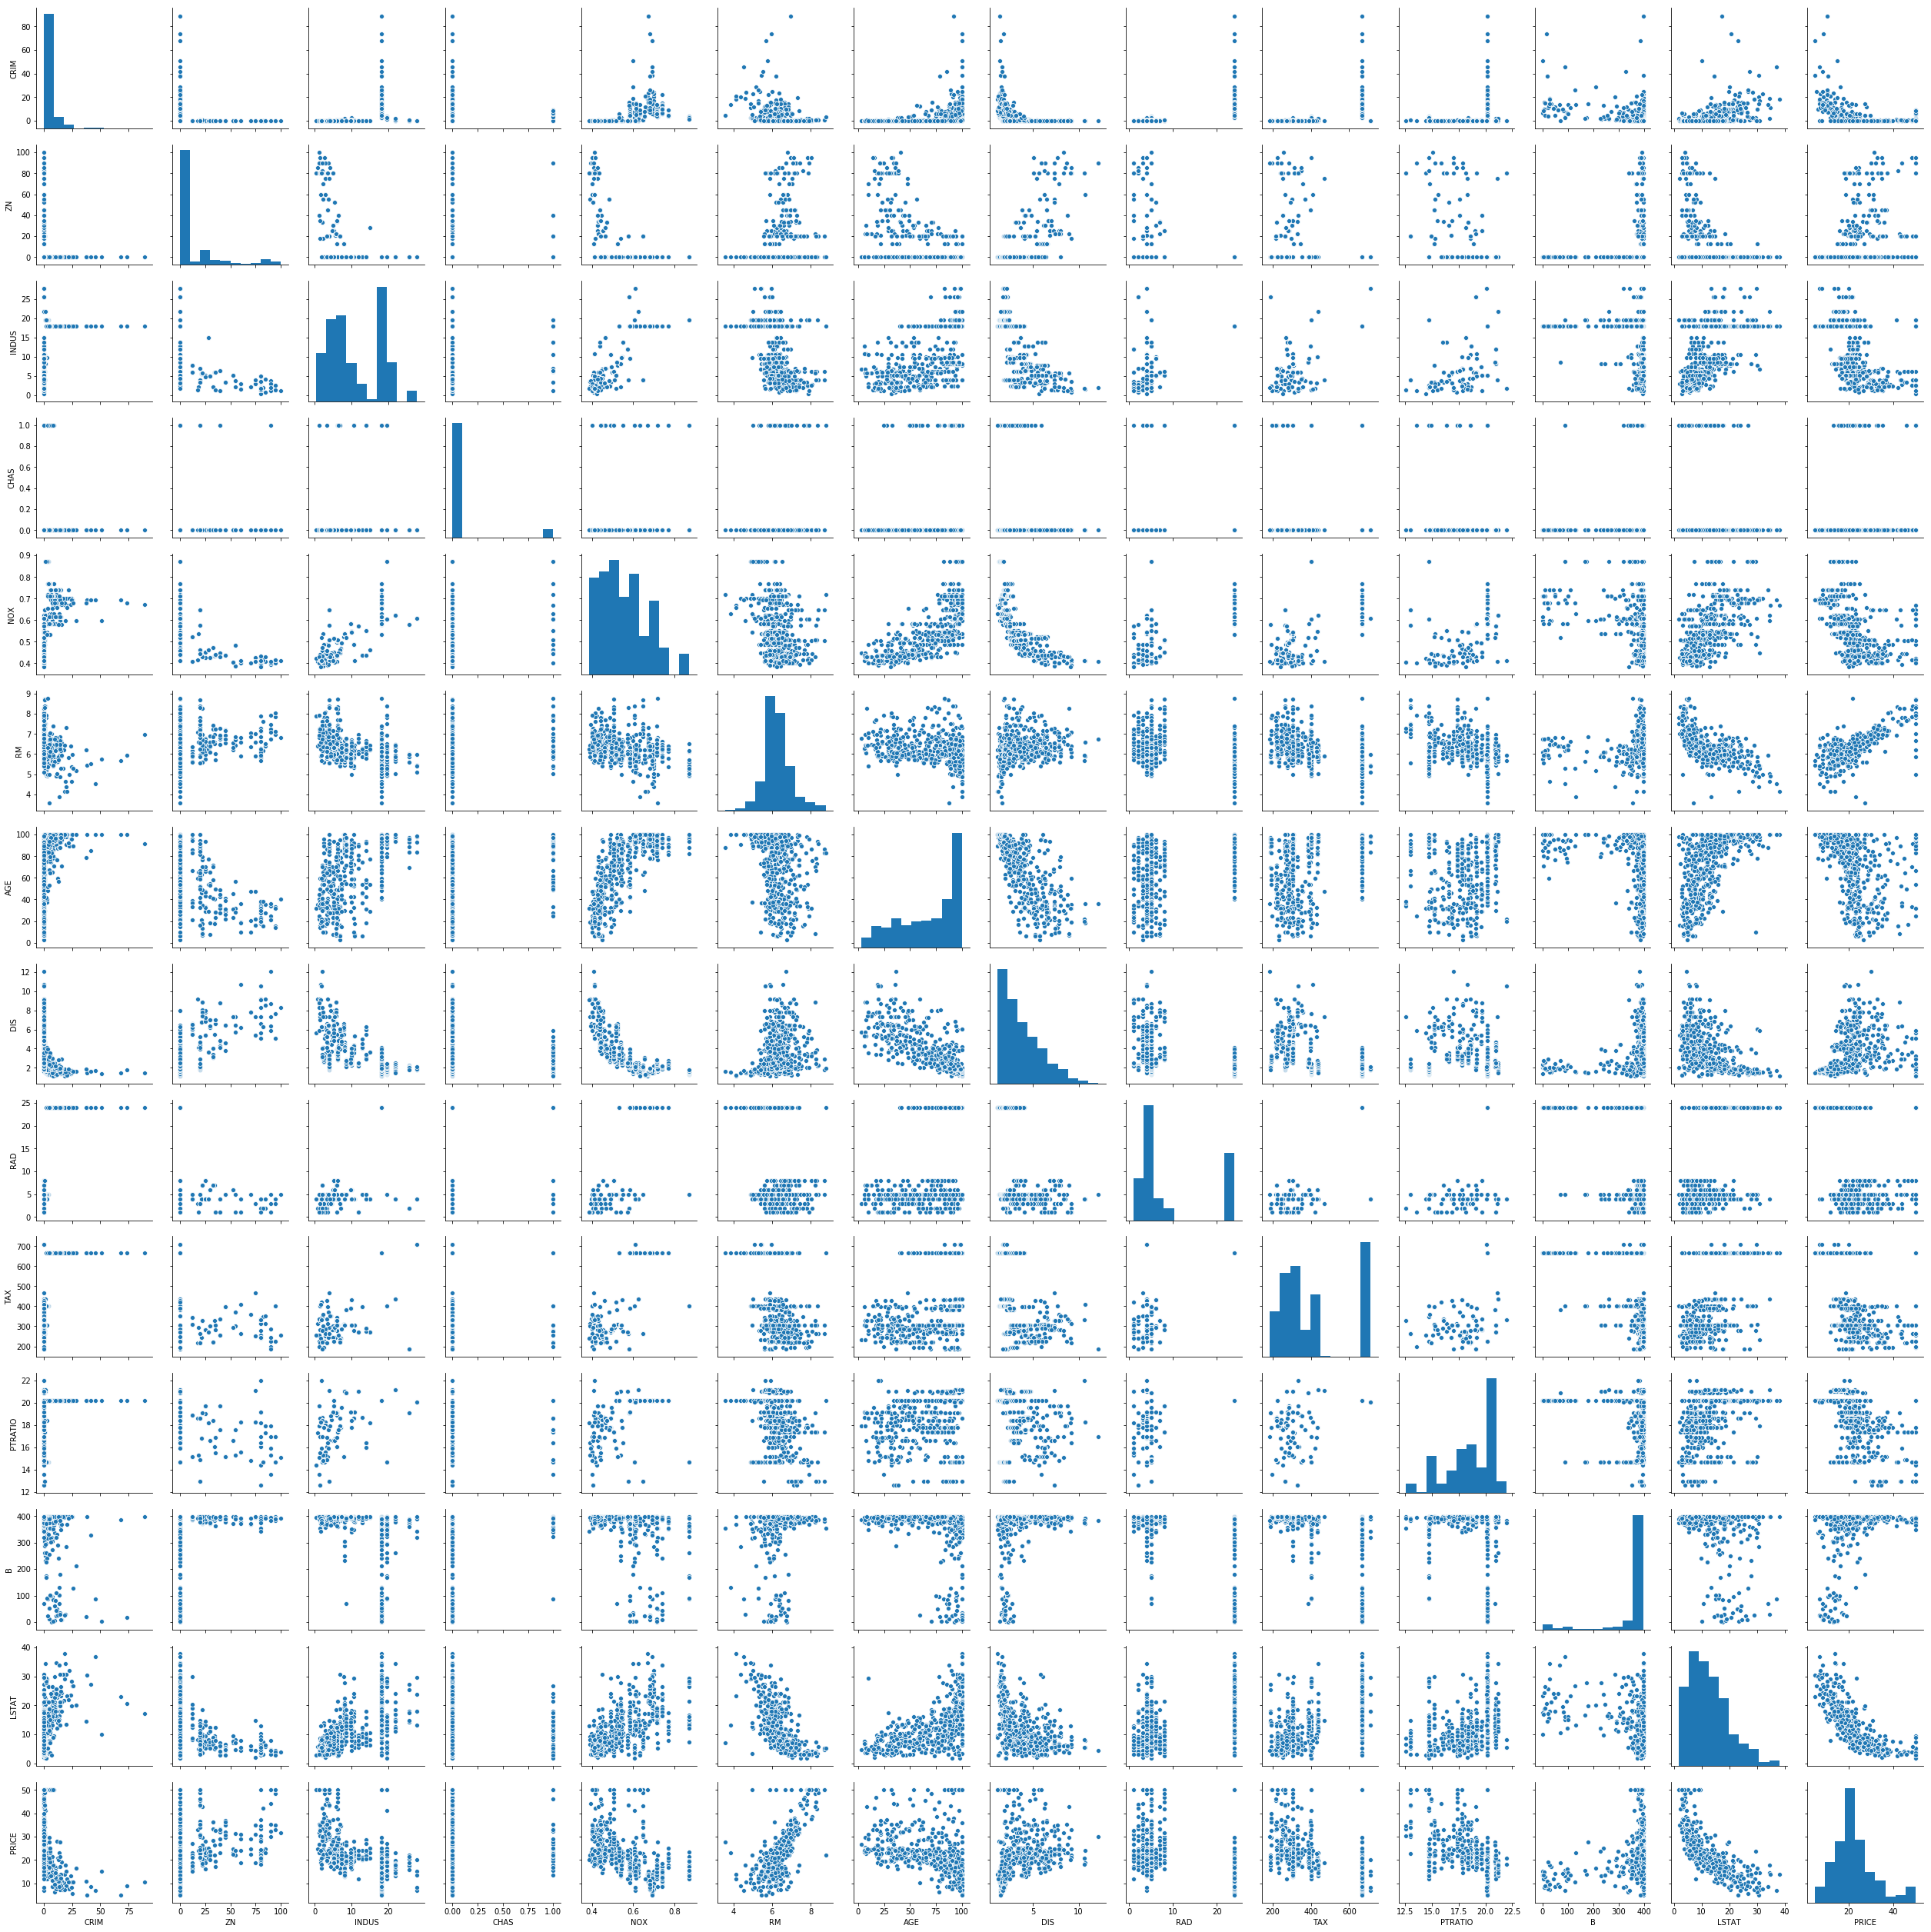

In [14]:
sns.pairplot(house_bos)

¿Qué ven en la gráfica? Ojo con el último renglón, pareciera ser que el número de cuartos se relaciona positivamente con el precio de las casas, es decir, a mayor número de cuartos, más caras son las casas. También vemos que el nivel de marginación en los barrios se relaciona negativamente con el precio de las casas.

In [47]:
house_bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Escojamos 3 variables para empezar a probar el modelo, luego metemos todas

In [48]:
X = house_bos[['CRIM', 'RM', "DIS"]]
X.head()

,CRIM,RM,DIS
0,0.00632,6.575,4.0900
1,0.02731,6.421,4.9671
2,0.02729,7.185,4.9671
3,0.03237,6.998,6.0622
4,0.06905,7.147,6.0622


In [49]:
y = boston.target

In [50]:
# Dividimos entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [52]:
# Modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lm.intercept_

-31.41821440022802

In [54]:
lm.coef_

array([-0.24645021,  8.61883074,  0.13963234])

In [56]:
y_pred = lm.predict(x_test)
y_pred

array([ 5.79526611, 26.33014594, 36.62775597, 14.56411086, 29.75902899,
       43.66484022, 24.8399899 , 19.83457262, 15.07451158, 30.69016045,
       22.55802519, 20.16633386, 21.24968765, 22.38674807, 17.79721886,
       21.21283771, 19.92063885, 33.56254409, 18.91838614, 13.71010758,
       18.28739436, 17.33767943, 29.12199926, 35.18539149, 24.97350291,
       22.63583892, 21.36711018, 20.6080734 , 21.48066831, 24.10807847,
       27.39670661, 28.22743552, 13.01411185, 19.37202594, 23.36502188,
       31.81884067, 22.61813609, 22.29489573, 17.96271363, 38.23202201,
       29.37371962, 21.20780932, 14.15029281, 35.65891778, 15.87192829,
       25.21673467, 19.3375738 , 22.97658268, 20.06916363, 26.9624261 ,
       27.38329894, 22.0565005 , 20.35732444, 14.40205328, 19.023789  ,
       21.97341339, 12.91815049,  1.47991125, 32.27078528, 13.26958393,
       23.12761362, 21.63728193, 20.97735663, 17.86614454, 19.75277269,
       24.02010742, 23.6427517 , 22.67688266, 21.57068742, 27.55

/home/azu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


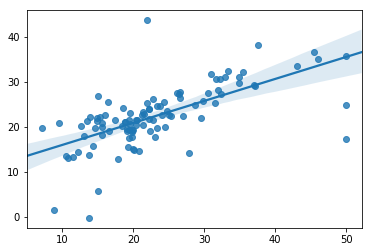

In [57]:
sns.regplot(x = y_test, y = y_pred)

¿Y qué pasó con el MSE?

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mean_squared_error(y_test, y_pred)

48.34988375940522

In [62]:
#Metamos más varibales a ver si se hace más chico el MSE
X = house_bos.drop('PRICE', axis = 1) # 1 - se quita de las columnas
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

lm.fit(x_train, y_train)

lm.intercept_ , lm.coef_

(31.835164121206684,
 array([-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,  1.26954150e+00,
        -1.54697747e+01,  4.31968412e+00, -9.80167937e-04, -1.36597953e+00,
         2.84521838e-01, -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
        -5.43790245e-01]))

[16.00330023 27.79447431 39.26769478 18.32613556 30.45487494 37.67724152
 25.28488162 10.22712629 14.82537224 31.99311717 28.98969206 19.17253244
 13.77310754 31.69400164 16.51057791 21.43127305 20.36911404 37.50141667
 18.10978575 15.81266015 13.80299258 24.48033748 32.93389583 39.42064642
 31.48120599 22.36455033 17.60924332 20.94828713 23.4130816  20.38151773
 25.79402412 34.04473076 15.11357401 21.91097373 24.05551144 34.58404676
 29.34099148 18.2535874  13.95709552 38.23179838 31.0049878  18.74606681
 19.72857941 40.31936227  8.19674997 27.30047872 19.28830095 25.58425976
 15.4961129  25.86694355 34.87324014 24.25453569 19.61772711 12.47561892
 24.42804102 17.9505124   9.69615055  2.3378285  31.80311538 13.65050017
 20.05798605 22.5516387  20.0245067  17.85753966 25.0631636  27.19590817
 25.97988145 22.09920138 24.66187205 30.39210736 20.40773803 28.56421717
 15.32650231 24.51102542 19.64891977 18.27221528 17.81706469 16.75705603
 28.93420488 -0.78820782 32.57992382 12.60054661 25

/home/azu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


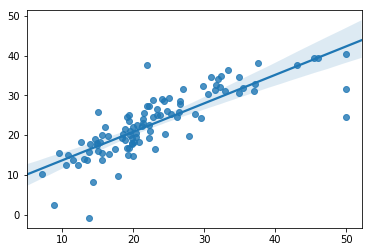

In [63]:
y_pred = lm.predict(x_test)
print(y_pred)
sns.regplot(x = y_test, y = y_pred) # al menos se ve un poquito mejor el ajuste del scatter

In [26]:
mean_squared_error(y_test, y_pred)

28.192485758469605

Y sí es mucho menor este Error cuadrado medio.

# Logit

Como vimos, las logits se utilizan cuando quiero clasificar cosas. Aprovechando el ajemplo de la clase pasada donde logramos clasificar correctamente como el 60% de las canciones nada más, probemos esa misma base pero con un logit en vez de un decision tree.

In [64]:
spotify = pd.read_csv('data_spotify.csv')
spotify = spotify.iloc[:, 1:]
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [65]:
X = spotify.iloc[:, :13]
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904


In [66]:
y = spotify.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [68]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(x_train, y_train)

/home/azu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
logit.score(x_test, y_test) # Accuracy

0.5396039603960396

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = logit.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


[[ 87 111]
 [ 75 131]]
0.5396039603960396
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       198
           1       0.54      0.64      0.58       206

   micro avg       0.54      0.54      0.54       404
   macro avg       0.54      0.54      0.53       404
weighted avg       0.54      0.54      0.54       404



Parece que está peor que el Decision Tree, pero podemos moverle parámetros y variables. Dense

Un ejemplo con sobrevivientes del Titanic https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python